In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: James O. Thomas
- Name 2: Xiaoxian Jing
- Name 3: Kuang Yan

___

# In Class Assignment Two
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#svm">Linear SVMs</a>
* <a href="#svm_using">Using Linear SVMs</a>
* <a href="#nonlinear">Non-linear SVMs</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "olivetti faces" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
# fetch the images for the dataset
# this will take a long time the first run because it needs to download
# after the first time, the dataset will be save to your disk (in sklearn package somewhere) 
# if this does not run, you may need additional libraries installed on your system (install at your own risk!!)
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=None)

In [3]:
# get some of the specifics of the dataset
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))
print (125*94) # the size of the images are the size of the feature vectors

n_samples: 3023
n_features: 11750
n_classes: 62
Original Image Sizes 125 by 94
11750


**Question 1:** For the faces dataset, describe what the data represents? That is, what is each column? What is each row? What do the unique class values represent?



This data represents represents the original images. Each row represents a ravelled (reshaped) image which is $125 \times 94$ pixels. Therefore each column is the pixel value corresponding to a specific location in the original image. The unique class values represent an ID corresponding to individuals represented in the dataset.


___

<a id="svm"></a>
<a href="#top">Back to Top</a>
## Linear Support Vector Machines

**Question 2:** If we were to train a linear Support Vector Machine (SVM) upon the faces data, how many parameters would need to be optimized in the model? That is, how many coefficients would need to be calculated?




We will need to optimize parameters equal to the number of features. This means we will need to optimize 11750 parameters for each class. This means we would have a total of $11,750 \times 62 = 728,500$ total parameters to optimize.


___

In [4]:
# Enter any scratchwork or calculations here


**Question 3:** 
- **Part A:** Given the number of parameters calculated above, would you expect the model to train quickly using **batch optimization techniques**? Why or why not? 
- **Part B:** Is there a way to reduce training time?
- **Part C:** If we transformed the X data using principle components analysis (PCA) with 100 components, how many parameters would we need to find for a linear Support Vector Machine (SVM)?



A. Yes, we expect this to train quickly with __batch optimization techniques__ because finding the gradient in each step will be computationally expensive. This is because the time complexity of each step is proportional to the size of the sample, and the overall complexity is more than quadratic in the sample size.

B.  We could reduce the training time using Newtin's method because this method will need fewer steps to find the optimal position. We could also use mini-batch method.

C. Using PCA with 100 components, we would need to find 100 parameters for each class for a total of 6200.
___

In [53]:
# Enter any scratchwork or calculations here

print('Part C. With 100 features we would need 100 parameters for each class for a total of 6200 total parameters')


Part C. With 100 features we would need 100 parameters for each class for a total of 6200 total parameters


___
<a id="svm_using"></a>
<a href="#top">Back to Top</a>

# Using Linear SVMs

**Exercise 1:** Use the block of code below to check if the number of parameters you calculated is equal to the number of parameters returned by `sklearn`'s implementation of the Linear SVM. **Was your calculation correct? If different, can you think of a reason why the parameters would not match?**

In [55]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

n_components = 100
pca = PCA(n_components=n_components,svd_solver='randomized')
Xpca = pca.fit_transform(X)

clf = LinearSVC()
clf.fit(Xpca,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [57]:
#===================================================================
# Enter your code below to calculate the number of parameters in the model 

print('for {} weights for each of {} classes, we have a total of {} parameters'.format(clf.coef_.shape[1],
                                                                                       clf.coef_.shape[0],
                                                                                       clf.coef_.shape[0]*clf.coef_.shape[1]))
#===================================================================

for 100 weights for each of 62 classes, we have a total of 6200 parameters


In the shape above, the 62 corresponds to the 62 classes in the data set. The 100 corresponds to the number of features for each class.

___
**Exercise 2:** Use the starter code below to calculate two quantities: 
- **Part A.:** The overall accuracy of the trained linear svm on the training set
- **Part B.:** The *mean, standard deviation, maximum, and minimum* of the **accuracy per class** on the training set

You might be interested in the following documentation of the confusion matrix calculated by `scikit-learn`:
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

And an example matrix returned by the confusion matrix function:
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png",width=400,height=400>

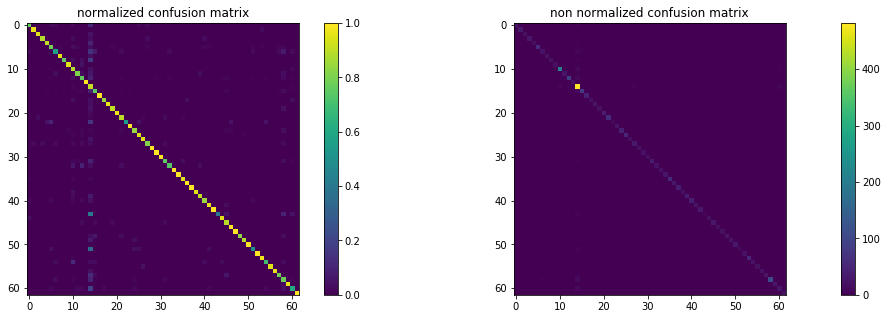

Overall Accuracy is 0.872 %
The class accuracy of 0 is 0.769
The class accuracy of 1 is 0.971
The class accuracy of 2 is 0.952
The class accuracy of 3 is 0.889
The class accuracy of 4 is 0.900
The class accuracy of 5 is 0.792
The class accuracy of 6 is 0.571
The class accuracy of 7 is 0.958
The class accuracy of 8 is 0.759
The class accuracy of 9 is 0.952
The class accuracy of 10 is 0.886
The class accuracy of 11 is 0.806
The class accuracy of 12 is 0.760
The class accuracy of 13 is 1.000
The class accuracy of 14 is 0.909
The class accuracy of 15 is 0.752
The class accuracy of 16 is 1.000
The class accuracy of 17 is 0.846
The class accuracy of 18 is 0.967
The class accuracy of 19 is 0.909
The class accuracy of 20 is 0.974
The class accuracy of 21 is 0.901
The class accuracy of 22 is 0.550
The class accuracy of 23 is 1.000
The class accuracy of 24 is 0.846
The class accuracy of 25 is 0.945
The class accuracy of 26 is 0.952
The class accuracy of 27 is 0.810
The class accuracy of 28 is 1.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

yhat = clf.predict(Xpca)

#===================================================
# Enter your code below

cm = confusion_matrix(y, yhat)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
diag = np.diagonal(cm_norm)

fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('non normalized confusion matrix')
im = ax.imshow(cm)
fig.colorbar(im, ax=ax)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('normalized confusion matrix')
im1 = ax1.imshow(cm_norm)
fig.colorbar(im1, ax=ax1)

plt.show()

print('Overall Accuracy is {:.3f} %'.format(accuracy_score(y, yhat)) )
for i in range(len(diag)):
    print('The class accuracy of {} is {:.3f}'.format(i, diag[i]))
print('\nsome statistics:\n')
print('mean {:.3f}'.format(np.mean(diag)))
print('standard deviation {:.3f}'.format(np.std(diag)))
print('max {:.3f}'.format(max(diag)))
print('min {:.3f}'.format(min(diag)))

#===================================================

___
<a id="nonlinear"></a>
<a href="#top">Back to Top</a>

# Non-linear SVMs
Now let's explore the use of non-linear svms. More explicitly, using different kernels. Take a look at the example training and testing code below for the non-linear SVM. All parameters are left as default, except we change the kernel to be `rbf`. Run the block of code below.



In [38]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(Xpca,y)
yhat = clf.predict(Xpca)
print('Overall Accuracy is ',accuracy_score(y,yhat))

Overall Accuracy is  0.938140919616


___
**Exercise 3:** Use the starter code from above to calculate the accuracy for three different non-linear SVM kernels. That is, repeat the code above for different `kernel` parameters. **Only use non-linear kernels.  Which kernel is most accurate with the default parameters?**

You might be interested in the documentation of the scikit-learn SVM implementation, available here:
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [42]:
#===================================================
# Enter your code below
from time import time

kernels = ['rbf', 'poly', 'sigmoid']
accuracies = []
for kern in kernels:
    t_start = time()
    clf = SVC(kernel = kern)
    clf.fit(Xpca,y)
    yhat = clf.predict(Xpca)
    acc = accuracy_score(y,yhat)
    accuracies.append(acc)
    t_stop = time()
    print('for kernel {}, overall accuracy is {:.3f}, calculated in {:.2f} seconds'.format(kern, 
                                                                                          acc, 
                                                                                          t_stop - t_start))
    
max_i = np.argmax(accuracies)
print('\nThe most accurate kernel is {} with an accuracy of {:.3f}'.format(kernels[max_i], accuracies[max_i]))

#===================================================

for kernel rbf, overall accuracy is 0.938, calculated in 5.57 seconds
for kernel poly, overall accuracy is 0.975, calculated in 3.87 seconds
for kernel sigmoid, overall accuracy is 0.215, calculated in 2.84 seconds

The most accurate kernel is poly with an accuracy of 0.975


___
**Exercise 4:** Choose the **most accurate kernel** and manipulate the settings for `gamma` to make the classification more accurate. 
- **Part A:** How accurate can you make it? 
- **Part B:** Would you expect the results to generalize well? Why or why not?

0.001:0.003:0.005:0.007:0.009:0.011:0.013:0.015:0.017:0.019:0.021:0.023:0.025:0.027:0.029:0.031:0.033:0.035:0.037:0.039:0.041:0.043:0.045:0.047:0.049:0.051:0.053:0.055:0.057:0.059:0.061:0.063:0.065:0.067:0.069:0.071:0.073:0.075:0.077:0.079:0.081:0.083:0.085:0.087:0.089:0.091:0.093:0.095:0.097:0.099:0.101:0.103:

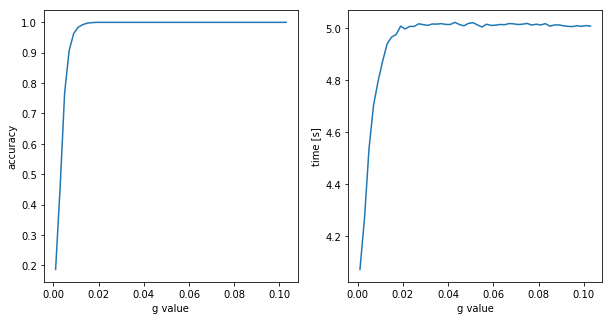

optimal g value of 0.019 with accuracy of 1.000


In [52]:
#===================================================
# Enter your code below

kern = 'poly'
gs = np.arange(0.001, 0.105, 0.002)

g_accuracies = []
times = []
for g in gs:
    t_start = time()
    yhat = SVC(kernel=kern, gamma=g).fit(Xpca,y).predict(Xpca)
    g_accuracies.append(accuracy_score(y,yhat))
    times.append(time()-t_start)
    print('{:.3f}'.format(g) , end=':') 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(gs, g_accuracies)
ax.set_xlabel('g value')
ax.set_ylabel('accuracy')
ax1 = fig.add_subplot(1,2,2)
ax1.plot(gs,times)
ax1.set_xlabel('g value')
ax1.set_ylabel('time [s]')
plt.show()

max_i = np.argmax(g_accuracies)
print('optimal g value of {:.3f} with accuracy of {:.3f}'.format(gs[max_i], g_accuracies[max_i]))
#===================================================

*Enter you answer here (double click)*

A. The highest accuracy we could achieve was 1. This was achieved at gamma $\approx$ 0.02 and was consistent for larger values of gamma. However, we are testing on the training data here so this value may not accuratly represent how well we could predict other data using this model.

B. We would not expect this to generalize because the optimal gamma value is very dependent upon the data as well as the kernel used.



___
**Final Question:** Using the most accurate non-linear SVM you found in the previous question, how many parameter coefficients does the trained model contain?

*Enter you answer here (double click)*



In [60]:
#===================================================
# Enter any scratchwork calculations you need below

clf = SVC(kernel = 'poly', gamma = 0.019).fit(Xpca,y)
print(clf.dual_coef_.shape)

(61, 2944)


As can be seen, we still have weights for 61 classes, each one contains information for 2944 parameters.

________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.